In [45]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/Users/karagiag/Downloads/aapl.csv', index_col=0, parse_dates=True)

In [4]:
data = data.drop(data.columns[[0,1,2,4]],axis=1)

In [5]:
data = data.sort_index()

In [6]:
data['ret']=np.log(data['Close']/data['Close'].shift(1))

In [7]:
data.head()

,Close,ret
Date,,
2011-01-03,47.08,NaN
2011-01-04,47.33,0.005296
2011-01-05,47.71,0.007997
2011-01-06,47.68,-0.000629
2011-01-07,48.02,0.007106


In [8]:
factors = pd.read_csv('C:/Users/karagiag/Downloads/FF_Factors_daily.csv')

In [9]:
factors.head()

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.24,-0.28,0.009
1,19260702,0.45,-0.32,-0.08,0.009
2,19260706,0.17,0.27,-0.35,0.009
3,19260707,0.09,-0.59,0.03,0.009
4,19260708,0.21,-0.36,0.15,0.009


In [10]:
factors['Date'] = pd.to_datetime(factors['Date'],format='%Y%m%d', errors='coerce')

In [11]:
factors.tail()

,Date,Mkt-RF,SMB,HML,RF
24054,2017-08-29,0.10,0.13,-0.39,0.003
24055,2017-08-30,0.53,0.02,-0.31,0.003
24056,2017-08-31,0.62,0.48,-0.41,0.003
24057,NaT,NaN,NaN,NaN,NaN
24058,NaT,NaN,NaN,NaN,NaN


In [12]:
factors = factors.drop(factors.tail(2).index)

In [13]:
factors.tail()

,Date,Mkt-RF,SMB,HML,RF
24052,2017-08-25,0.18,0.12,0.57,0.003
24053,2017-08-28,0.08,0.35,-0.74,0.003
24054,2017-08-29,0.10,0.13,-0.39,0.003
24055,2017-08-30,0.53,0.02,-0.31,0.003
24056,2017-08-31,0.62,0.48,-0.41,0.003


In [14]:
factors=factors.set_index('Date')

In [15]:
data = pd.concat([data,factors],join='inner', axis=1)

In [16]:
data.head()

,Close,ret,Mkt-RF,SMB,HML,RF
Date,,,,,,
2011-01-03,47.08,NaN,1.18,0.53,0.79,0.0
2011-01-04,47.33,0.005296,-0.26,-1.38,0.11,0.0
2011-01-05,47.71,0.007997,0.59,0.61,0.14,0.0
2011-01-06,47.68,-0.000629,-0.15,-0.06,-0.32,0.0
2011-01-07,48.02,0.007106,-0.21,-0.26,-0.31,0.0


In [17]:
data = data.drop(data.head(1).index)

In [18]:
data.head()

,Close,ret,Mkt-RF,SMB,HML,RF
Date,,,,,,
2011-01-04,47.33,0.005296,-0.26,-1.38,0.11,0.0
2011-01-05,47.71,0.007997,0.59,0.61,0.14,0.0
2011-01-06,47.68,-0.000629,-0.15,-0.06,-0.32,0.0
2011-01-07,48.02,0.007106,-0.21,-0.26,-0.31,0.0
2011-01-10,48.92,0.018569,-0.02,0.56,-0.15,0.0


In [19]:
data['ret']=data['ret']-data['RF']

In [20]:
model = sm.OLS(data['ret'],data[data.columns[2:5]])

In [21]:
results=model.fit()

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 31 Oct 2017   Prob (F-statistic):          7.03e-123
Time:                        12:05:18   Log-Likelihood:                 4338.5
No. Observations:                1509   AIC:                            -8671.
Df Residuals:                    1506   BIC:                            -8655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.0097      0.000     24.786      0.0

In [50]:
#The Durbin-Watson test statistic tests the null hypothesis that the residuals from an
#ordinary least-squares regression are not autocorrelated against the alternative that the
#residuals follow an AR1 process. The Durbin-Watson statistic ranges in value from 0
#to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive
#autocorrelation; a value toward 4 indicates negative autocorrelation
# A value between the lower and upper bound means the test is inconclusive

In [ ]:
# Jarque–Bera tests whether sample data have the skewness and kurtosis matching a normal distribution
#In order to interpret results, you may need to do a little comparison
#Checking p-values is always a good idea. For example, a tiny p-value and a large chi-square value from this test 
#means that you can reject the null hypothesis that the data is normally distributed.

In [77]:
sms.diagnostic.kstest_normal(results.resid)

(0.064119657737748026, 6.315807393279096e-16)

In [ ]:
#The Kolmogorov-Smirnov test is defined by:
#H0:	The data follow a specified distribution
#Ha:	The data do not follow the specified distribution
# Significance level:  α = 0.01
# Critical value:  1.358/√n = 0.034    
# Critical region:  Reject H0 if D > 0.034 or
# p-value=6.315807393279096e-16 < a (so we reject the Null of normality)

In [56]:
sms.omni_normtest(results.resid)

NormaltestResult(statistic=343.44032266634514, pvalue=2.6477775860957098e-75)

(array([  0.09578862,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.09578862,   0.        ,
          0.        ,   0.09578862,   0.19157725,   0.        ,
          0.38315449,   0.76630899,   1.91577246,   3.35260181,
          7.47151261,  21.45665159,  36.30388818,  33.14286361,
         22.70190369,   9.57886232,   3.63996768,   2.10734971,
          0.28736587,   0.28736587,   0.28736587,   0.09578862,
          0.19157725,   0.09578862]),
 array([-0.13170747, -0.12478921, -0.11787095, -0.1109527 , -0.10403444,
        -0.09711618, -0.09019792, -0.08327966, -0.0763614 , -0.06944314,
        -0.06252488, -0.05560662, -0.04868836, -0.0417701 , -0.03485184,
        -0.02793358, -0.02101533, -0.01409707, -0.00717881, -0.00026055,
         0.00665771,  0.01357597,  0.02049423,  0.02741249,  0.03433075,
         0.04124901,  0.04816727,  0.05508553,  0.06200378,  0.06892204,
         0.0758403 ]),
 <a list of 30 Patch objects>)

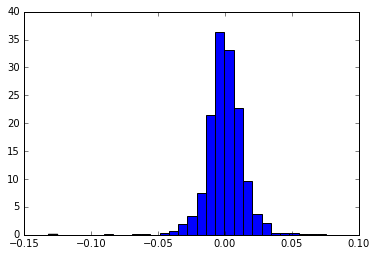

In [55]:
%matplotlib inline
plt.hist(results.resid, normed=True, bins=30)

In [ ]:
# when kurtosis>3 (here is 12) distribution is leptokurtic

((array([-3.3143778 , -3.05783615, -2.91521157, ...,  2.91521157,
          3.05783615,  3.3143778 ]),
  array([-0.13170747, -0.08995891, -0.06361704, ...,  0.06269002,
          0.06459299,  0.0758403 ])),
 (0.013165209432216817, -1.8625619480469656e-05, 0.96264583432436512))

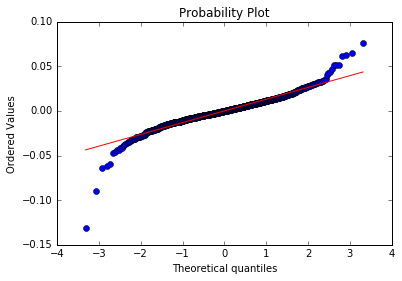

In [58]:
import scipy.stats as stats
# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
stats.probplot(results.resid, plot=plt)

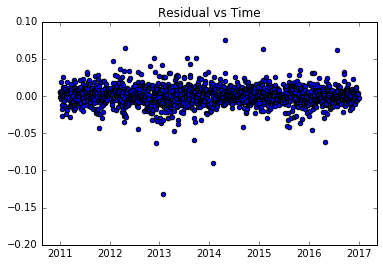

In [75]:
plt.scatter(data.index,results.resid)
# Residuals look independent
plt.title('Residual vs Time')

In [65]:
#Checking for Equal (constant) Variance, i.e. heteroskedasticity by plotting
#Plot residuals against fitted values 
# First fit values
data['ret_pred'] = results.predict(data[data.columns[2:5]])

(-0.06, 0.06)

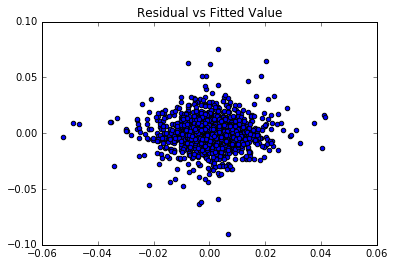

In [74]:
plt.scatter(data['ret_pred'],results.resid)
plt.title('Residual vs Fitted Value')
plt.ylim([-.10,0.10])
plt.xlim([-.06,0.06])

In [82]:
#Checking for Equal (constant) Variance, i.e. heteroskedasticity with Tests
#Breusch-Pagan test:
name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid,results.model.exog)
print (name,test)

(['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'], (0.37733252485290103, 0.82806281625977229, 0.1255588501750225, 0.94500148966327358))


In [ ]:
# If the test statistic has a p-value below an appropriate threshold (e.g. p<0.05) 
#then the null hypothesis of homoskedasticity is rejected and heteroskedasticity assumed.

In [83]:
# Checking for Linearity in the data
# By plotting (here I have 3 factors so difficult) or by test statistics
# Harvey_collier Test (checks if null: residuals have a mean of 0)
test = sms.linear_harvey_collier(results)
print test

Ttest_1sampResult(statistic=-0.074727913506813529, pvalue=0.94044112906467026)


In [87]:
# Second test for cheking linearity is the 
# Rainbow Test()
test = sms.diagnostic.linear_rainbow(results)
print test

(0.71174007890353863, 0.99999836875995818)


In [91]:
# Testing for autocorellation of residuals
# Durbin Watson / Ljung - Box
test1 = sms.durbin_watson(results.resid)
test2 = sms.acorr_ljungbox(results.resid, lags = 10, boxpierce=False)
print test1, test2
# DW near 2 means no autocorrelation
# p-values<0.05  mean there is no autocorrelation

1.89828156066 (array([  3.90148444,   4.25595483,   5.67746645,   5.72700664,
         8.10434469,  10.72144513,  12.38201013,  14.76111339,
        14.76664925,  15.10982558]), array([ 0.04824346,  0.1190779 ,  0.12840116,  0.22048426,  0.15057797,
        0.09737656,  0.08867564,  0.06396033,  0.0975484 ,  0.12810882]))


In [96]:
# Testing for multicolinearity.  
#Multicollinearity refers to the situation when two independent variables are highly correlated 
# Let's start by looking at the corr matrix of the exogenous variables
corr_matrix = data[data.columns[2:5]].corr()
corr_matrix

,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.358181,0.118814
SMB,0.358181,1.000000,-0.123406
HML,0.118814,-0.123406,1.000000


In [97]:
# Also from numpy we can use the Condition number
np.linalg.cond(results.model.exog)
# If value is large we get a warning at the summary table,
#"The condition number is large, 4.86e+09. 
# "This might indicate that there are strong multicollinearity or other numerical problems."

2.3891339074985289